In [50]:
import utils.helper_functions_v2 as hf
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [51]:
run_random_search = False
league = 'mls'
seasons = '2018-2024'
season_test = 2022

In [52]:
# Read the data
X_full, y, X_test_full, y_test, odds_test = hf.get_league_data(league, seasons, season_test)
display(X_full)

,game_date,season,home_team,away_team,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2018-05-19,2018,Philadelphia,Real Salt Lake,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,...,0.000000,20.000000,80.000000,40.0,0.0,60.0,602.6,8046.4,1.70,2.46
1,2018-05-19,2018,New England,Columbus Crew,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,...,20.000000,40.000000,40.000000,60.0,40.0,0.0,4402.6,4200.0,1.92,0.82
2,2018-05-20,2018,Minnesota Utd,Sporting KC,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,...,60.000000,20.000000,20.000000,60.0,20.0,20.0,5202.4,4020.0,2.62,1.06
3,2018-05-26,2018,NY Red Bulls,Philadelphia,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,...,20.000000,0.000000,80.000000,60.0,0.0,40.0,6004.8,4620.2,1.30,1.10
4,2018-05-25,2018,Dynamo,NYCFC,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,...,28.571429,42.857143,28.571429,40.0,20.0,40.0,604.8,6284.0,1.90,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2021-11-07,2021,CF Montréal,Orlando City,46.464646,36.363636,30.303030,33.333333,56.250000,25.000000,...,25.000000,31.250000,43.750000,20.0,60.0,20.0,1.4,1.4,1.44,1.04
928,2021-11-07,2021,NYCFC,Philadelphia,50.505051,42.424242,24.242424,33.333333,62.500000,18.750000,...,18.750000,50.000000,31.250000,40.0,40.0,20.0,1.8,1.4,1.80,0.88
929,2021-11-07,2021,Toronto FC,D.C. United,28.282828,18.181818,30.303030,51.515152,25.000000,43.750000,...,12.500000,25.000000,62.500000,20.0,20.0,60.0,0.8,2.4,1.14,2.04
930,2021-11-07,2021,Colorado Rapids,Los Angeles FC,58.585859,48.484848,30.303030,21.212121,50.000000,43.750000,...,25.000000,18.750000,56.250000,60.0,40.0,0.0,2.2,1.0,1.88,1.82


In [53]:
# Define categorical and numerical columns
categorical_cols, numerical_cols = hf.set_numerical_categorical_cols(X_full)

# Keep selected columns only
X_train, y_train, X_test = hf.filter_datasets(X_full, y, X_test_full, categorical_cols, numerical_cols)

In [54]:
# hf.plot_feature_corr_chart(X_train, numerical_cols)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,away_away_win_pct,away_away_draw_pct,away_away_loss_pct,away_win_pct_last_games,away_draw_pct_last_games,away_loss_pct_last_games,away_score_last_games,away_conceded_last_games,away_xg_last_games,away_conceded_xg_last_games
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,0.000000,20.000000,80.000000,40.0,0.0,60.0,602.6,8046.4,1.70,2.46
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,20.000000,40.000000,40.000000,60.0,40.0,0.0,4402.6,4200.0,1.92,0.82
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,60.000000,20.000000,20.000000,60.0,20.0,20.0,5202.4,4020.0,2.62,1.06
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,20.000000,0.000000,80.000000,60.0,0.0,40.0,6004.8,4620.2,1.30,1.10
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,28.571429,42.857143,28.571429,40.0,20.0,40.0,604.8,6284.0,1.90,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2021.0,46.464646,36.363636,30.303030,33.333333,56.250000,25.000000,18.750000,20.0,60.0,...,25.000000,31.250000,43.750000,20.0,60.0,20.0,1.4,1.4,1.44,1.04
928,2021.0,50.505051,42.424242,24.242424,33.333333,62.500000,18.750000,18.750000,60.0,20.0,...,18.750000,50.000000,31.250000,40.0,40.0,20.0,1.8,1.4,1.80,0.88
929,2021.0,28.282828,18.181818,30.303030,51.515152,25.000000,43.750000,31.250000,0.0,60.0,...,12.500000,25.000000,62.500000,20.0,20.0,60.0,0.8,2.4,1.14,2.04
930,2021.0,58.585859,48.484848,30.303030,21.212121,50.000000,43.750000,6.250000,40.0,20.0,...,25.000000,18.750000,56.250000,60.0,40.0,0.0,2.2,1.0,1.88,1.82


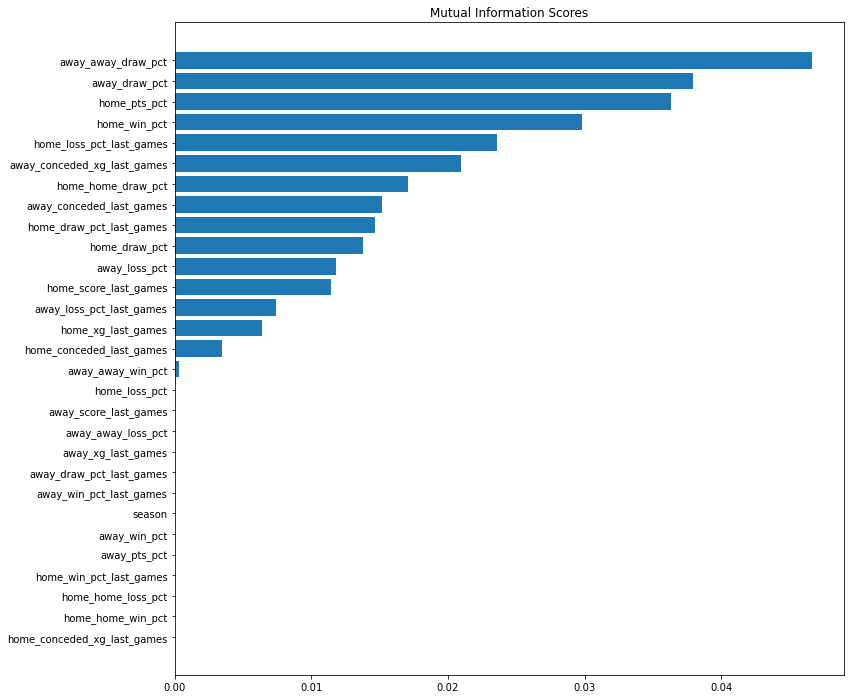

In [55]:
X_train = hf.transform_x(X_train, categorical_cols, numerical_cols)
X_test = hf.transform_x(X_test, categorical_cols, numerical_cols)

display(X_train)
first_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(first_mi_scores)

In [56]:
hf.create_cluster_features(X_train, X_test, first_mi_scores)

Total features to consider when clustering: 29


,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,Cluster_20,Cluster_21,Cluster_22,Cluster_23,Cluster_24,Cluster_25,Cluster_26,Cluster_27,Cluster_28,Cluster_29
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,4,2,1,0,1,1,0,4,4,0
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,1,2,1,3,0,1,3,1,0,3
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,4,2,1,1,0,3,4,3,3,1
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,4,2,1,0,4,2,3,2,1,4
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,4,2,1,1,0,3,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2021.0,46.464646,36.363636,30.303030,33.333333,56.250000,25.000000,18.750000,20.0,60.0,...,3,4,3,0,2,4,0,1,1,4
928,2021.0,50.505051,42.424242,24.242424,33.333333,62.500000,18.750000,18.750000,60.0,20.0,...,1,0,3,3,0,2,4,3,1,2
929,2021.0,28.282828,18.181818,30.303030,51.515152,25.000000,43.750000,31.250000,0.0,60.0,...,0,4,3,0,3,4,2,0,3,3
930,2021.0,58.585859,48.484848,30.303030,21.212121,50.000000,43.750000,6.250000,40.0,20.0,...,1,0,3,0,1,1,0,1,2,2


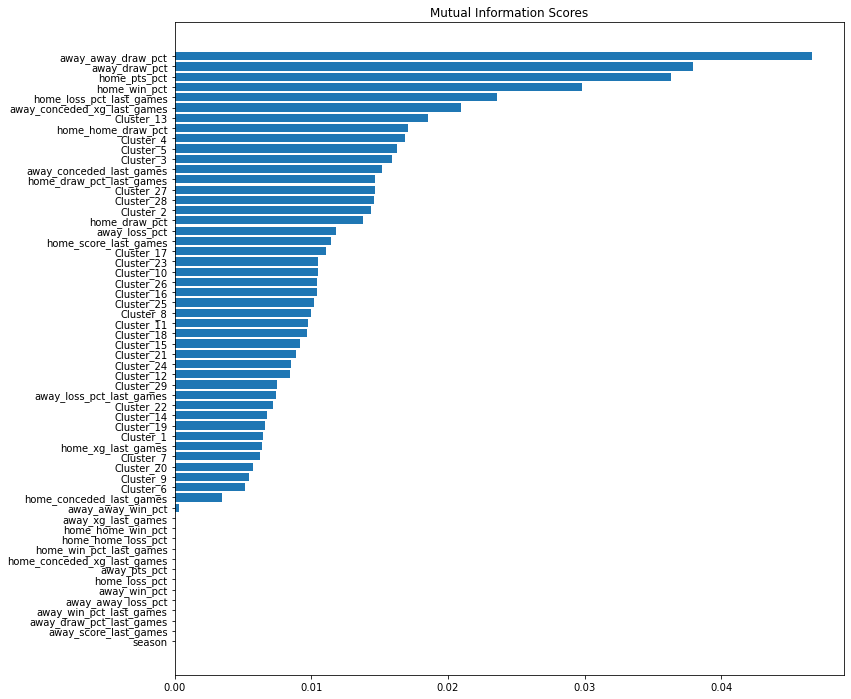

In [57]:
display(X_train)
second_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(second_mi_scores)

In [58]:
X_train, X_test = hf.apply_pca_datasets(X_train, X_test, second_mi_scores)

Total features to consider when doing the PCA: 44


In [59]:
if run_random_search: hf.run_random_forest_random_search(X_train, y_train)
    
# Best models found by the RandomSearch algorithm
# GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=0)
# RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
#                        min_samples_leaf=2, min_samples_split=10,
#                        n_estimators=2000, random_state=0)

,season,home_pts_pct,home_win_pct,home_draw_pct,home_loss_pct,home_home_win_pct,home_home_draw_pct,home_home_loss_pct,home_win_pct_last_games,home_draw_pct_last_games,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,2018.0,36.666667,30.000000,20.000000,50.000000,40.000000,40.000000,20.000000,40.0,0.0,...,0.377876,-0.075208,-0.058495,-0.093638,-0.174740,-0.108924,0.047029,-0.065006,-0.109189,3.463756e-16
1,2018.0,56.666667,50.000000,20.000000,30.000000,66.666667,16.666667,16.666667,40.0,20.0,...,0.028053,-0.041199,-0.048065,0.124723,-0.234093,-0.062652,-0.118309,0.012608,-0.004792,-2.424159e-16
2,2018.0,36.363636,36.363636,0.000000,63.636364,60.000000,0.000000,40.000000,40.0,0.0,...,-0.114863,-0.175975,0.235292,0.161253,0.095973,-0.036874,0.055136,-0.099146,0.008230,4.634388e-15
3,2018.0,70.000000,70.000000,0.000000,30.000000,80.000000,0.000000,20.000000,80.0,0.0,...,-0.059442,-0.034587,0.130197,0.304081,0.021582,-0.056327,0.123187,0.012448,0.077607,-4.255378e-16
4,2018.0,50.000000,40.000000,30.000000,30.000000,60.000000,0.000000,40.000000,60.0,20.0,...,0.344752,0.108280,0.030736,0.263819,0.190088,-0.058017,-0.217896,0.108156,0.083238,-6.978147e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2021.0,46.464646,36.363636,30.303030,33.333333,56.250000,25.000000,18.750000,20.0,60.0,...,-0.138072,0.095729,0.100987,0.106941,-0.044384,0.044780,-0.002645,-0.004260,0.068991,2.883327e-16
928,2021.0,50.505051,42.424242,24.242424,33.333333,62.500000,18.750000,18.750000,60.0,20.0,...,-0.010646,0.008873,0.043052,0.102669,-0.119845,0.014432,-0.025101,-0.070613,0.025650,1.417121e-16
929,2021.0,28.282828,18.181818,30.303030,51.515152,25.000000,43.750000,31.250000,0.0,60.0,...,-0.199462,-0.229111,0.040010,0.089079,0.107931,-0.099536,0.059963,-0.024927,-0.001490,3.854133e-17
930,2021.0,58.585859,48.484848,30.303030,21.212121,50.000000,43.750000,6.250000,40.0,20.0,...,-0.031648,0.020411,-0.056618,-0.111721,-0.073666,0.041197,0.097202,-0.112798,0.029667,-2.807967e-16


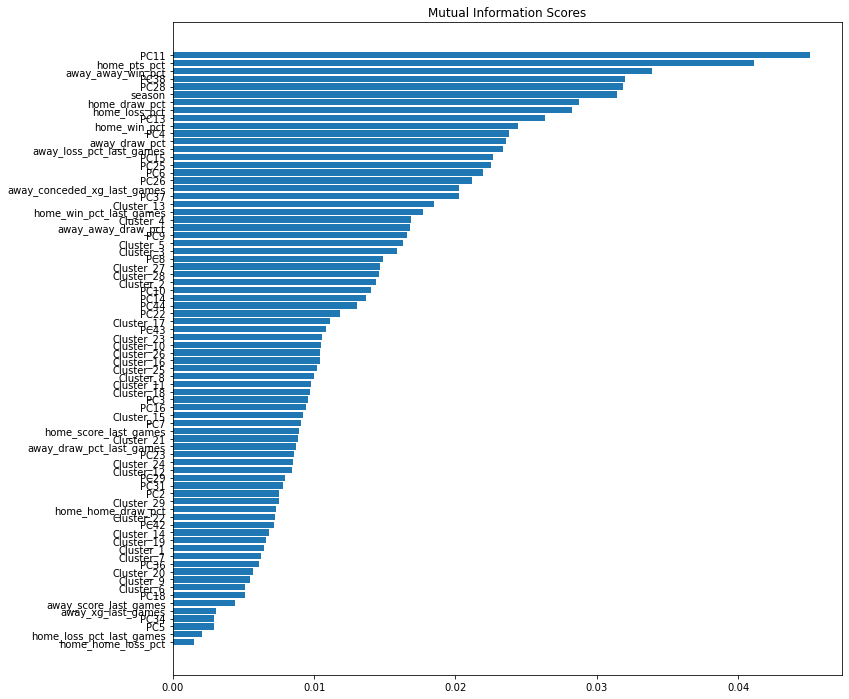

In [60]:
display(X_train)
min_mi_score=0.001
third_mi_scores = hf.make_mi_scores(X_train, y_train)
hf.plot_mi_scores(third_mi_scores[third_mi_scores > min_mi_score])

Results for model logistic_regression:
Training score: 0.5268299695244667
Classification Report:
              precision    recall  f1-score   support

           A       0.46      0.13      0.20        86
           D       0.00      0.00      0.00        79
           H       0.49      0.94      0.64       152

    accuracy                           0.49       317
   macro avg       0.32      0.36      0.28       317
weighted avg       0.36      0.49      0.36       317

Confusion Matrix:
[[143   0   9]
 [ 75   0   4]
 [ 75   0  11]]


Times when H was predicted: 293 (0.92)
Times when D was predicted: 0 (0.0)
Times when A was predicted: 24 (0.08)

Model profit: -588.0
Maximum negative sequence:  8
Maximum positive sequence:  7


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
932,A,H,0.368717,0.225788,0.405495,3.39,2.08,3.52,-100.0,2000.0
933,A,H,0.257207,0.326885,0.415908,2.49,2.81,3.26,-100.0,1800.0
934,D,H,0.230586,0.243425,0.525989,2.22,3.36,3.16,-100.0,1700.0
935,A,A,0.497588,0.157793,0.344619,1.89,3.91,3.60,291.0,1991.0
936,H,H,0.180978,0.244812,0.574210,1.89,4.04,3.53,89.0,2080.0
...,...,...,...,...,...,...,...,...,...,...
1244,H,H,0.239368,0.265283,0.495349,1.65,4.55,4.19,65.0,1450.0
1245,H,H,0.158981,0.343063,0.497957,1.89,3.73,3.74,89.0,1539.0
1246,A,H,0.329626,0.252961,0.417414,3.28,1.95,4.04,-100.0,1439.0
1247,D,H,0.223713,0.240930,0.535357,1.64,4.36,4.38,-100.0,1339.0


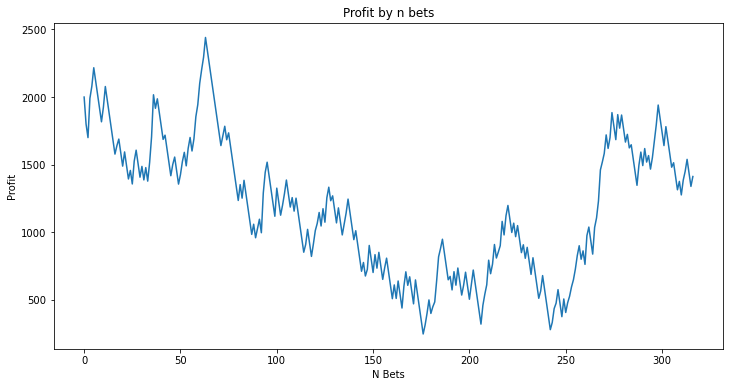

Results for model naive_bayes:
Training score: 0.4516129032258064
Classification Report:
              precision    recall  f1-score   support

           A       0.34      0.36      0.35        86
           D       0.34      0.28      0.31        79
           H       0.53      0.56      0.54       152

    accuracy                           0.44       317
   macro avg       0.40      0.40      0.40       317
weighted avg       0.43      0.44      0.43       317

Confusion Matrix:
[[85 23 44]
 [41 22 16]
 [35 20 31]]


Times when H was predicted: 161 (0.51)
Times when D was predicted: 65 (0.21)
Times when A was predicted: 91 (0.29)

Model profit: 692.0
Maximum negative sequence:  8
Maximum positive sequence:  6


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
932,A,A,0.748107,0.132734,0.119159,3.39,2.08,3.52,108.0,2000.0
933,A,A,0.435226,0.304051,0.260724,2.49,2.81,3.26,181.0,2289.0
934,D,D,0.244250,0.685867,0.069883,2.22,3.36,3.16,216.0,2505.0
935,A,A,0.903163,0.052397,0.044440,1.89,3.91,3.60,291.0,2796.0
936,H,H,0.159098,0.192453,0.648450,1.89,4.04,3.53,89.0,2885.0
...,...,...,...,...,...,...,...,...,...,...
1244,H,D,0.294534,0.398339,0.307127,1.65,4.55,4.19,-100.0,2708.0
1245,H,H,0.075018,0.406049,0.518934,1.89,3.73,3.74,89.0,2797.0
1246,A,A,0.428776,0.298825,0.272400,3.28,1.95,4.04,95.0,2892.0
1247,D,H,0.156893,0.337422,0.505685,1.64,4.36,4.38,-100.0,2792.0


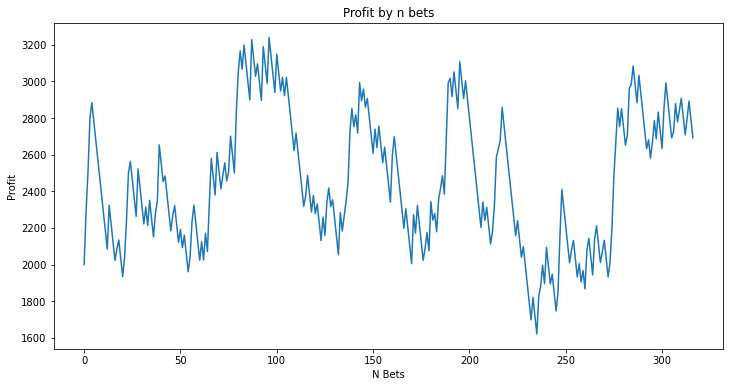

Results for model decision_tree:
Training score: 0.49996549939623947
Classification Report:
              precision    recall  f1-score   support

           A       0.32      0.07      0.11        86
           D       0.10      0.01      0.02        79
           H       0.47      0.89      0.62       152

    accuracy                           0.45       317
   macro avg       0.30      0.33      0.25       317
weighted avg       0.34      0.45      0.33       317

Confusion Matrix:
[[136   7   9]
 [ 74   1   4]
 [ 78   2   6]]


Times when H was predicted: 288 (0.91)
Times when D was predicted: 10 (0.03)
Times when A was predicted: 19 (0.06)

Model profit: -2827.0
Maximum negative sequence:  12
Maximum positive sequence:  10


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
932,A,H,0.274368,0.194946,0.530686,3.39,2.08,3.52,-100.0,2000.0
933,A,H,0.215859,0.189427,0.594714,2.49,2.81,3.26,-100.0,1800.0
934,D,H,0.215859,0.189427,0.594714,2.22,3.36,3.16,-100.0,1700.0
935,A,H,0.437500,0.062500,0.500000,1.89,3.91,3.60,-100.0,1600.0
936,H,H,0.000000,0.350000,0.650000,1.89,4.04,3.53,89.0,1689.0
...,...,...,...,...,...,...,...,...,...,...
1244,H,H,0.174194,0.354839,0.470968,1.65,4.55,4.19,65.0,-789.0
1245,H,H,0.000000,0.350000,0.650000,1.89,3.73,3.74,89.0,-700.0
1246,A,H,0.174194,0.354839,0.470968,3.28,1.95,4.04,-100.0,-800.0
1247,D,H,0.215859,0.189427,0.594714,1.64,4.36,4.38,-100.0,-900.0


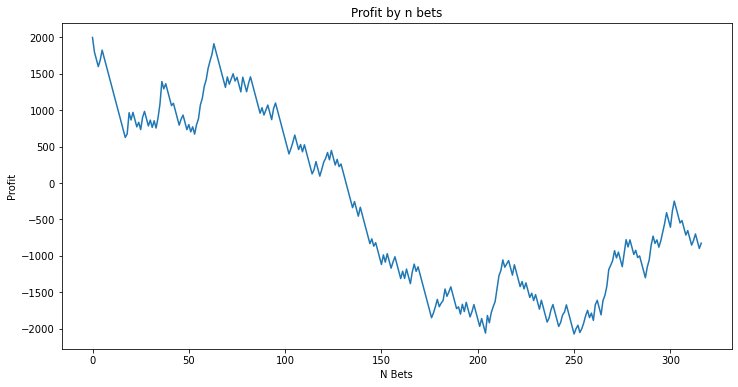

Results for model random_forest:
Training score: 0.5246506813869243
Classification Report:
              precision    recall  f1-score   support

           A       0.40      0.05      0.08        86
           D       0.00      0.00      0.00        79
           H       0.48      0.97      0.64       152

    accuracy                           0.48       317
   macro avg       0.29      0.34      0.24       317
weighted avg       0.34      0.48      0.33       317

Confusion Matrix:
[[148   0   4]
 [ 77   0   2]
 [ 82   0   4]]


Times when H was predicted: 307 (0.97)
Times when D was predicted: 0 (0.0)
Times when A was predicted: 10 (0.03)

Model profit: -1125.0
Maximum negative sequence:  7
Maximum positive sequence:  7


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
932,A,H,0.287011,0.226653,0.486336,3.39,2.08,3.52,-100.0,2000.0
933,A,H,0.260598,0.228850,0.510553,2.49,2.81,3.26,-100.0,1800.0
934,D,H,0.251826,0.273049,0.475125,2.22,3.36,3.16,-100.0,1700.0
935,A,A,0.459937,0.230267,0.309796,1.89,3.91,3.60,291.0,1991.0
936,H,H,0.257848,0.245370,0.496782,1.89,4.04,3.53,89.0,2080.0
...,...,...,...,...,...,...,...,...,...,...
1244,H,H,0.257349,0.267290,0.475361,1.65,4.55,4.19,65.0,913.0
1245,H,H,0.206962,0.284983,0.508055,1.89,3.73,3.74,89.0,1002.0
1246,A,H,0.210956,0.254392,0.534653,3.28,1.95,4.04,-100.0,902.0
1247,D,H,0.235587,0.233262,0.531151,1.64,4.36,4.38,-100.0,802.0


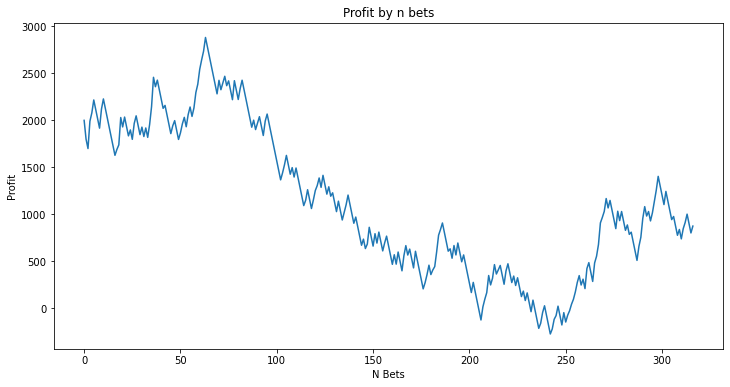

Results for model voting_classifier:
Classification Report:
              precision    recall  f1-score   support

           A       0.47      0.17      0.25        86
           D       0.33      0.01      0.02        79
           H       0.49      0.91      0.64       152

    accuracy                           0.49       317
   macro avg       0.43      0.36      0.30       317
weighted avg       0.44      0.49      0.38       317

Confusion Matrix:
[[138   2  12]
 [ 73   1   5]
 [ 71   0  15]]


Times when H was predicted: 282 (0.89)
Times when D was predicted: 3 (0.01)
Times when A was predicted: 32 (0.1)

Model profit: -575.0
Maximum negative sequence:  8
Maximum positive sequence:  10


,outcome,pred,away_probs,draw_probs,home_probs,home_odds,away_odds,draw_odds,profit,progress
932,A,A,0.419551,0.195030,0.385419,3.39,2.08,3.52,108.0,2000.0
933,A,H,0.292222,0.262303,0.445474,2.49,2.81,3.26,-100.0,2008.0
934,D,H,0.235630,0.347942,0.416428,2.22,3.36,3.16,-100.0,1908.0
935,A,A,0.574547,0.125739,0.299714,1.89,3.91,3.60,291.0,2199.0
936,H,H,0.149481,0.258159,0.592360,1.89,4.04,3.53,89.0,2288.0
...,...,...,...,...,...,...,...,...,...,...
1244,H,H,0.241361,0.321437,0.437201,1.65,4.55,4.19,65.0,1463.0
1245,H,H,0.110240,0.346023,0.543736,1.89,3.73,3.74,89.0,1552.0
1246,A,H,0.285888,0.290254,0.423858,3.28,1.95,4.04,-100.0,1452.0
1247,D,H,0.208013,0.250260,0.541726,1.64,4.36,4.38,-100.0,1352.0


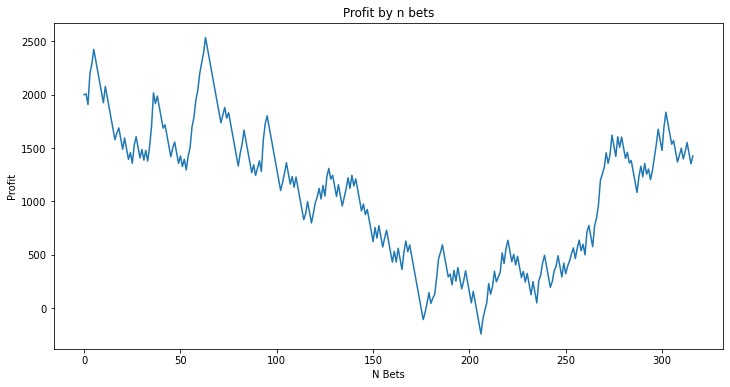

In [61]:
import json
import pandas as pd
from joblib import load
from sklearn.ensemble import VotingClassifier
import pickle

def won_bet(row):
    return 1 if row['profit'] > 0 else 0

dir_path = f"leagues_v2/{league}/best_models/{season_test}"
models_path = f"{dir_path}/best_models.json"
with open(models_path, 'rb') as file:
    models_dict = json.load(file)
    
models = models_dict.keys()
voting_classifier_estimators = []
for model in models:
    model_path = f"{dir_path}/{model}.joblib"
    try:
        loaded_model = load(model_path)
    except:
        with open(model_path, 'rb') as file:
            loaded_model = pickle.load(file)
    models_dict[model]['estimator'] = loaded_model
    score = models_dict[model]['score']
    voting_classifier_estimators.append((model, models_dict[model]['estimator']))
    
models_dict['voting_classifier'] = {'estimator': VotingClassifier(estimators=voting_classifier_estimators, voting='soft')}

progress_data = []
for model in models_dict.keys():
    print(f"Results for model {model}:")
    score = models_dict[model].get('score')
    if score:
        print('Training score:', score)
    my_pipeline = hf.build_pipeline(X_train, y_train, models_dict[model]['estimator'])
    test_results_df = hf.build_pred_df(my_pipeline, X_test, y_test, odds_test)
    display(test_results_df)
    hf.plot_betting_progress(test_results_df)
    test_results_df['won'] = test_results_df.apply(lambda x: won_bet(x), axis=1)
    total_won = test_results_df['won'].sum()
    progress_data.append([test_results_df['profit'].sum(), score, total_won/len(test_results_df)])
    
cols = ['profit', 'training_score', 'test_score']
profit_df = pd.DataFrame(progress_data, columns=cols, index=models_dict.keys())

In [62]:
display(profit_df)

,profit,training_score,test_score
logistic_regression,-588.0,0.526830,0.485804
naive_bayes,692.0,0.451613,0.435331
decision_tree,-2827.0,0.499965,0.451104
random_forest,-1125.0,0.524651,0.479495
voting_classifier,-575.0,NaN,0.485804
